<h1>Cervical Cancer Risk Prediction Using Aritificial Neural Network From Scratch</h1>

<strong>Dataset:</strong> <a href="https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors">Cervical Cancer (Risk Factors) Dataset | UCI Machine Learning Repository</a> </br>
<strong>Note:</strong> The model is not able to predict True Positive result most of the time as there are very less data of positive instances (i.e. people who got diagnosed with Cervical Cancer) in the dataset. Due to this, precision, accuracy, recall score and F1 score of the model is 0.0.

In [178]:
# Import necessary libraries.
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score

import warnings

In [179]:
# Ignore unnecessary warning.
warnings.filterwarnings('ignore')

In [180]:
# Import the dataset.
df = pd.read_csv("cervical_cancer_risk_factors.csv")

# Check the number of rows and columns.
print(df.shape)

# Check the first 5 data.
df.head()

(858, 36)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


<h1>Data Preprocessing</h1>

In [181]:
# Describe dataset
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [182]:
# Summarize dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [183]:
# Check unique values of each columns.
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")
    print("============================================================")
    print()

Unique values in Age: [18 15 34 52 46 42 51 26 45 44 27 43 40 41 39 37 38 36 35 33 31 32 30 23
 28 29 20 25 21 24 22 48 19 17 16 14 59 79 84 47 13 70 50 49]

Unique values in Number of sexual partners: ['4.0' '1.0' '5.0' '3.0' '2.0' '6.0' '?' '7.0' '15.0' '8.0' '10.0' '28.0'
 '9.0']

Unique values in First sexual intercourse: ['15.0' '14.0' '?' '16.0' '21.0' '23.0' '17.0' '26.0' '20.0' '25.0' '18.0'
 '27.0' '19.0' '24.0' '32.0' '13.0' '29.0' '11.0' '12.0' '22.0' '28.0'
 '10.0']

Unique values in Num of pregnancies: ['1.0' '4.0' '2.0' '6.0' '3.0' '5.0' '?' '8.0' '7.0' '0.0' '11.0' '10.0']

Unique values in Smokes: ['0.0' '1.0' '?']

Unique values in Smokes (years): ['0.0' '37.0' '34.0' '1.266972909' '3.0' '12.0' '?' '18.0' '7.0' '19.0'
 '21.0' '15.0' '13.0' '16.0' '8.0' '4.0' '10.0' '22.0' '14.0' '0.5' '11.0'
 '9.0' '2.0' '5.0' '6.0' '1.0' '32.0' '24.0' '28.0' '20.0' '0.16']

Unique values in Smokes (packs/year): ['0.0' '37.0' '3.4' '2.8' '0.04' '0.5132021277' '2.4' '6.0' '?' '9.0'
 '1.

In [184]:
# Replace "?" with "NaN".
df = df.replace("?", np.nan)
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [185]:
# Summarize the dataframe after replacing "?" with "NaN".
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           832 non-null    object
 2   First sexual intercourse            851 non-null    object
 3   Num of pregnancies                  802 non-null    object
 4   Smokes                              845 non-null    object
 5   Smokes (years)                      845 non-null    object
 6   Smokes (packs/year)                 845 non-null    object
 7   Hormonal Contraceptives             750 non-null    object
 8   Hormonal Contraceptives (years)     750 non-null    object
 9   IUD                                 741 non-null    object
 10  IUD (years)                         741 non-null    object
 11  STDs                                753 non-null    object

In [186]:
# Check number of null values in each of the columns.
df.isnull().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [187]:
# Drop "STDs: Time since first diagnosis" & "STDs: Time since last diagnosis" columns.
df = df.drop(["STDs: Time since first diagnosis", "STDs: Time since last diagnosis"], axis=1)

In [188]:
# Convert all the value to numeric.
df = df.apply(pd.to_numeric)

# Fill the NaN values with the mean value of the column.
df = df.fillna(df.mean())

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           858 non-null    float64
 2   First sexual intercourse            858 non-null    float64
 3   Num of pregnancies                  858 non-null    float64
 4   Smokes                              858 non-null    float64
 5   Smokes (years)                      858 non-null    float64
 6   Smokes (packs/year)                 858 non-null    float64
 7   Hormonal Contraceptives             858 non-null    float64
 8   Hormonal Contraceptives (years)     858 non-null    float64
 9   IUD                                 858 non-null    float64
 10  IUD (years)                         858 non-null    float64
 11  STDs                                858 non-n

In [190]:
# Split dataset into feature(X) and target(y) labels.
X = df.drop("Biopsy", axis=1)
y = df["Biopsy"]

In [191]:
X.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,0,1,0,1,0,0,0,0
4,46,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


In [192]:
# Check unique value of the target label.
print(y.unique())

[0 1]


<h1>Split Data into Train and Test</h1>

In [193]:
# Split data into train and test.
random_seed = 32
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

In [194]:
X_train.shape, y_train.shape

((686, 33), (686,))

In [195]:
X_test.shape, y_test.shape

((172, 33), (172,))

In [196]:
# Scale training and test data. 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [197]:
# Count unique values in train and test target labels
unique_values_train, counts_train = np.unique(y_train, return_counts=True)
for value, count in zip(unique_values_train, counts_train):
    print(f"Train Value {value}: Count {count}")

unique_values_test, counts_test = np.unique(y_test, return_counts=True)
for value, count in zip(unique_values_test, counts_test):
    print(f"Test Value {value}: Count {count}")

Train Value 0: Count 640
Train Value 1: Count 46
Test Value 0: Count 163
Test Value 1: Count 9


<h1> Model Training </h1>

In [198]:
# Converting training and testing data to numpy array
X_train =  np.array(X_train).T
y_train = np.array(y_train).T
X_test = np.array(X_test).T
y_test = np.array(y_test).T

In [199]:
# Initializing weights and biases 
def init_params(input_features, hiddden_layer_size, output_size):
    W1 = np.random.randn(hiddden_layer_size, input_features) - 0.5 
    b1 = np.random.randn(hiddden_layer_size, 1) - 0.5 
    W2 = np.random.randn(output_size, hiddden_layer_size) - 0.5 
    b2 = np.random.randn(output_size, 1) - 0.5 
    return W1, b1, W2, b2

In [200]:
# RelU Activation function
def ReLU(Z):
    return np.maximum(0, Z)

In [201]:
# Sigmoid Activation Functiion
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

In [202]:
# Derivative ReLU
def deriv_ReLU(Z):
    return Z > 0

In [203]:
# Forward Popagation
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

In [204]:
# One hot encoding 
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [205]:
# Backpropagation
def back_prop(Z1, A1, Z2, A2, W2, X, y):
    m = y.size
    one_hot_y = one_hot(y)
    dZ2 = A2 - one_hot_y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(A1.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [206]:
# Update weights and biases
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    return W1, b1, W2, b2

In [207]:
# Prediction Function
def get_predictions(A2):
    return np.argmax(A2, 0)

In [208]:
# Accuract Function 
def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

In [209]:
# Gradient Descent 
def gradient_descent(X, y, epochs, learning_rate, input_features, hidden_layer_size, output_size):
    W1, b1, W2, b2 = init_params(input_features, hidden_layer_size, output_size)
    for epoch in range(epochs):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, W1, db1, dW2, db2, learning_rate)
        
        print("Epoch:", epoch)
        predictions = get_predictions(A2)
        print("Accuracy:", get_accuracy(predictions, y))
        print("==============================")
        print("/n")
    return W1, b1, W2, b2

In [210]:
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

In [211]:
# Initializing learning rate, epochs, input features, hidden layer size and output size
learning_rate = 0.1
epochs = 30
input_features = X_train.shape[0]
hidden_layer_size = 10
output_size = 2

In [212]:
W1, b1, W2, b2 = gradient_descent(X_train, y_train, epochs, learning_rate, input_features, hidden_layer_size, output_size)

Epoch: 0
Accuracy: 0.1588921282798834
/n
Epoch: 1
Accuracy: 0.5364431486880467
/n
Epoch: 2
Accuracy: 0.7142857142857143
/n
Epoch: 3
Accuracy: 0.7638483965014577
/n
Epoch: 4
Accuracy: 0.7959183673469388
/n
Epoch: 5
Accuracy: 0.8177842565597667
/n
Epoch: 6
Accuracy: 0.8294460641399417
/n
Epoch: 7
Accuracy: 0.8425655976676385
/n
Epoch: 8
Accuracy: 0.8513119533527697
/n
Epoch: 9
Accuracy: 0.8556851311953353
/n
Epoch: 10
Accuracy: 0.8673469387755102
/n
Epoch: 11
Accuracy: 0.8746355685131195
/n
Epoch: 12
Accuracy: 0.8790087463556852
/n
Epoch: 13
Accuracy: 0.880466472303207
/n
Epoch: 14
Accuracy: 0.8833819241982507
/n
Epoch: 15
Accuracy: 0.8892128279883382
/n
Epoch: 16
Accuracy: 0.892128279883382
/n
Epoch: 17
Accuracy: 0.8994169096209913
/n
Epoch: 18
Accuracy: 0.902332361516035
/n
Epoch: 19
Accuracy: 0.9067055393586005
/n
Epoch: 20
Accuracy: 0.9067055393586005
/n
Epoch: 21
Accuracy: 0.9052478134110787
/n
Epoch: 22
Accuracy: 0.9052478134110787
/n
Epoch: 23
Accuracy: 0.9081632653061225
/n
Epoch

In [213]:
# make prediction.
predictions = predict(X_test, W1, b1, W2, b2)

# Calculate metrics
accuracy = accuracy_score(predictions, y_test)
precision = precision_score(predictions, y_test)
recall = recall_score(predictions, y_test)
f1 = f1_score(predictions, y_test)
cm = confusion_matrix(predictions, y_test)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall Score: {recall}")
print(f"F1 Score: {f1}")
print(f"Confustion Matrix: \n {cm}" )

Accuracy: 0.9534883720930233
Precision: 0.1111111111111111
Recall Score: 1.0
F1 Score: 0.19999999999999998
Confustion Matrix: 
 [[163   8]
 [  0   1]]


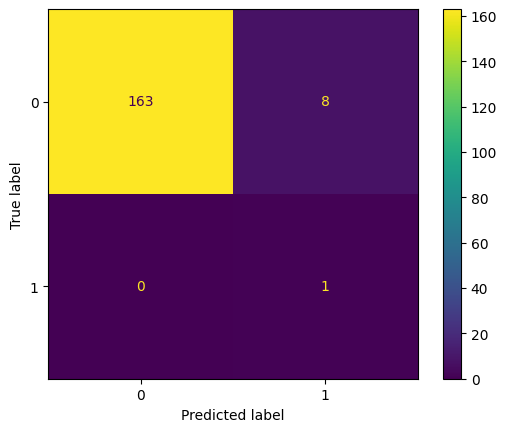

In [214]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot();